In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [6]:
def read_csv(file_path):
    df = pd.read_csv(file_path, delimiter=',')
    return df

In [7]:
data = read_csv("particle_data0.csv")
data.head()

,ParticleType,Energy
0,mu-,173.093
1,mu-,173.093
2,mu-,173.093
3,2mu-,171.797
4,2mu-,171.797


In [8]:
data.shape

(414315, 2)

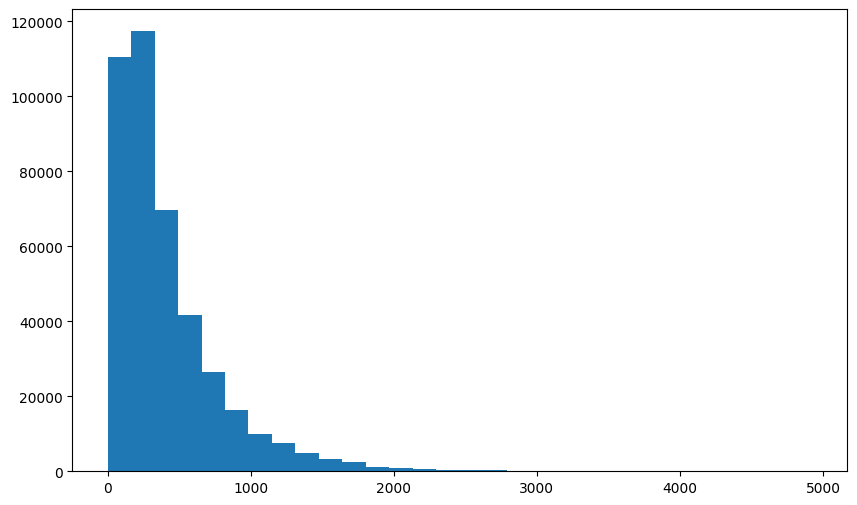

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(data["Energy"], bins=30)
plt.savefig('energy_distribution.png')
plt.show()

In [10]:
particle_col = data.columns[0]
energy_col = data.columns[1]

# Separate particles based on whether they have "2" at position 0
det1_particle = []
det1_energy = []
det2_particle = []
det2_energy = []
det3_particle = []
det3_energy = []
det4_particle = []
det4_energy = []

for i, row in data.iterrows():
    particle_name = str(row[particle_col])
    energy = float(row[energy_col])
    
    # Check if particle was detected in detector 2
    if particle_name.startswith('2') or '_2' in particle_name or 'Det_2' in particle_name:
        det2_particle.append(particle_name)
        det2_energy.append(energy)
    elif particle_name.startswith('3') or '_3' in particle_name or 'Det_3' in particle_name:
        det3_particle.append(particle_name)
        det3_energy.append(energy)
    elif particle_name.startswith('4') or '_4' in particle_name or 'Det_4' in particle_name:
        det4_particle.append(particle_name)
        det4_energy.append(energy)
    else:
        det1_particle.append(particle_name)
        det1_energy.append(energy)


In [31]:
mu_p_1 = []  # mu+ particles in detector 1
mu_p_1_e = []  # mu+ energies in detector 1
mu_m_1 = []  # mu- particles in detector 1
mu_m_1_e = []  # mu- energies in detector 1
pi_p_1 = []  # pi+ particles in detector 1
pi_p_1_e = []  # pi+ energies in detector 1
pi_m_1 = []  # pi- particles in detector 1
pi_m_1_e = []  # pi- energies in detector 1
mu_p_2 = []  # mu+ particles in detector 2
mu_p_2_e = []  # mu+ energies in detector 2
mu_m_2 = []  # mu- particles in detector 2
mu_m_2_e = []  # mu- energies in detector 2
pi_p_2 = []  # pi+ particles in detector 2
pi_p_2_e = []  # pi+ energies in detector 2
pi_m_2 = []  # pi- particles in detector 2
pi_m_2_e = []  # pi- energies in detector 2

In [32]:

for i in range(0, len(det1_particle)):
    if det1_particle[i] == "mu+":
        mu_p_1.append(det1_particle[i])
        mu_p_1_e.append(det1_energy[i])
    elif det1_particle[i] == "mu-":
        mu_m_1.append(det1_particle[i])
        mu_m_1_e.append(det1_energy[i])
    elif det1_particle[i] == "pi+":
        pi_p_1.append(det1_particle[i])
        pi_p_1_e.append(det1_energy[i])
    elif det1_particle[i] == "pi-":
        pi_m_1.append(det1_particle[i])
        pi_m_1_e.append(det1_energy[i])

In [33]:
for i in range(0, len(det2_particle)):
    # Strip any detector suffix to get the base particle name
    particle_name = det2_particle[i]
    if particle_name == "2mu+":
        mu_p_2.append(det2_particle[i])
        mu_p_2_e.append(det2_energy[i])
    elif particle_name == "2mu-":
        mu_m_2.append(det2_particle[i])
        mu_m_2_e.append(det2_energy[i])
    elif particle_name == "2pi+":
        pi_p_2.append(det2_particle[i])
        pi_p_2_e.append(det2_energy[i])
    elif particle_name == "2pi-":
        pi_m_2.append(det2_particle[i])
        pi_m_2_e.append(det2_energy[i])

In [ ]:
for i in range(0, len(det3_particle)):
    # Strip any detector suffix to get the base particle name
    particle_name = det2_particle[i]
    if particle_name == "3mu+":
        mu_p_2.append(det2_particle[i])
        mu_p_2_e.append(det2_energy[i])
    elif particle_name == "3mu-":
        mu_m_2.append(det2_particle[i])
        mu_m_2_e.append(det2_energy[i])
    elif particle_name == "3pi+":
        pi_p_2.append(det2_particle[i])
        pi_p_2_e.append(det2_energy[i])
    elif particle_name == "3pi-":
        pi_m_2.append(det2_particle[i])
        pi_m_2_e.append(det2_energy[i])

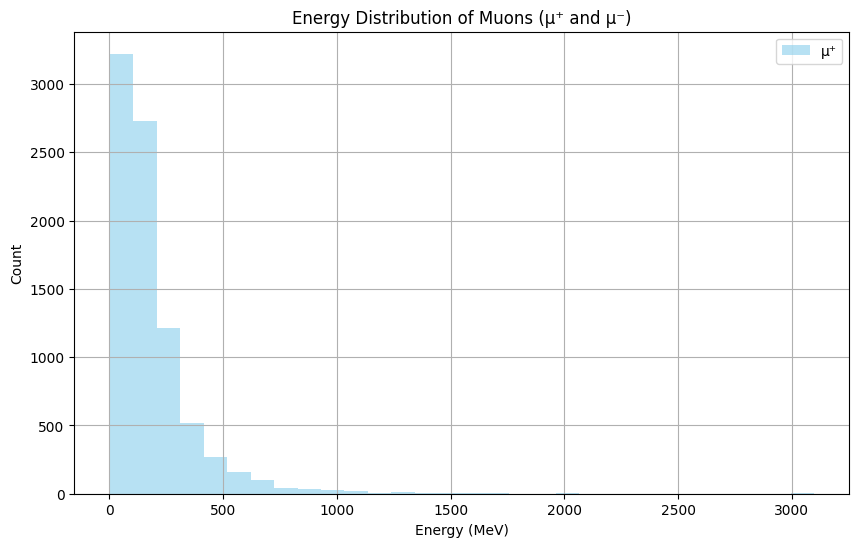

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(mu_p_1_e, bins=30, alpha=0.6, label='μ⁺', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Muons (μ⁺ and μ⁻)')
plt.legend()
plt.grid(True)
plt.show()

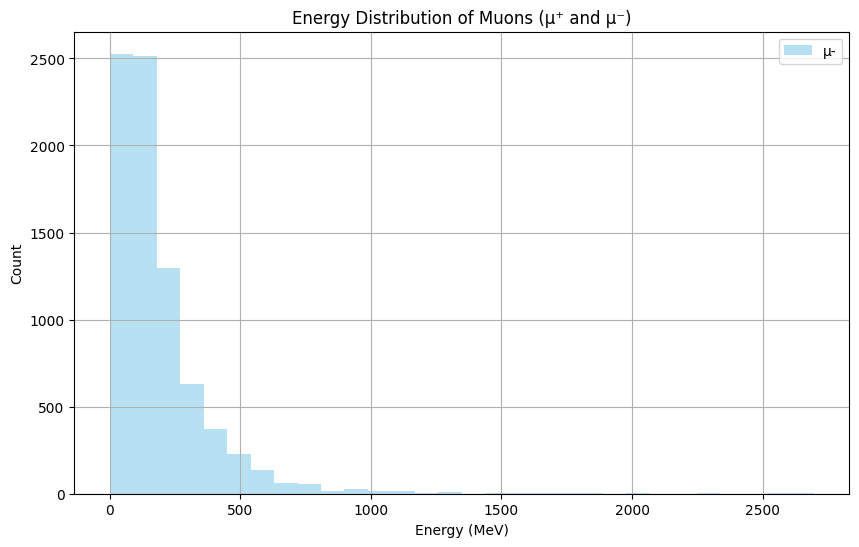

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(mu_m_1_e, bins=30, alpha=0.6, label='μ-', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Muons (μ⁺ and μ⁻)')
plt.legend()
plt.grid(True)
plt.show()

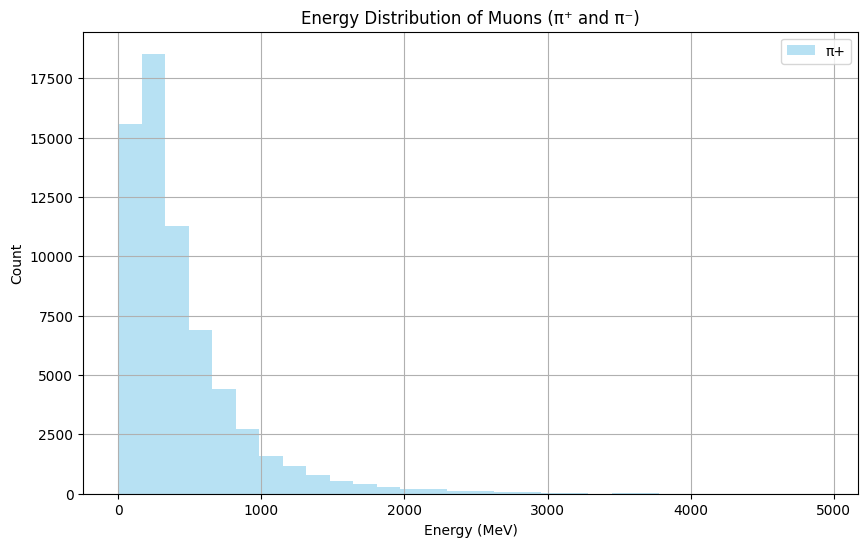

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(pi_p_1_e, bins=30, alpha=0.6, label='π+', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Muons (π⁺ and π⁻)')
plt.legend()
plt.grid(True)
plt.show()

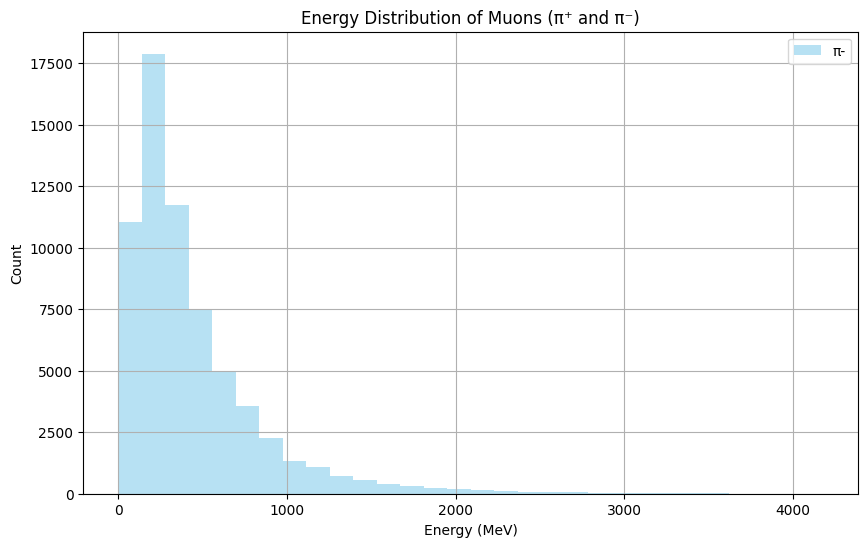

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(pi_m_1_e, bins=30, alpha=0.6, label='π-', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Muons (π⁺ and π⁻)')
plt.legend()
plt.grid(True)
plt.show()

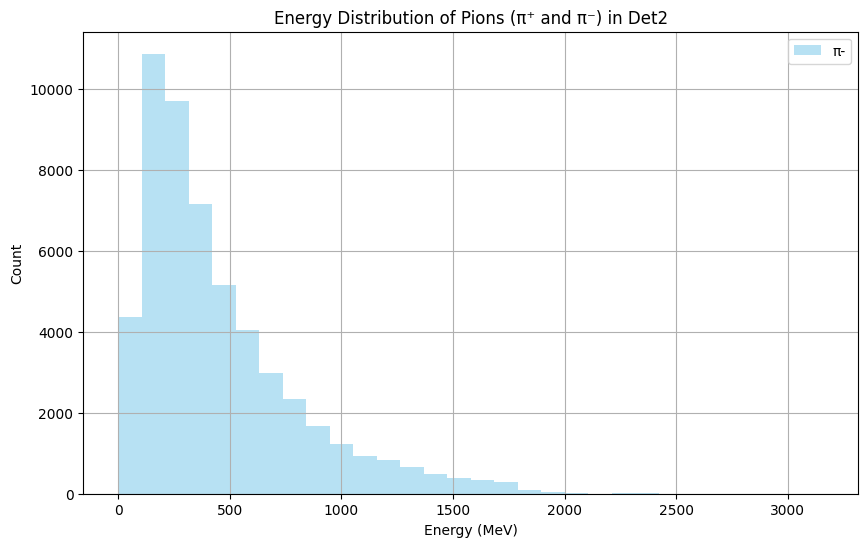

In [38]:
plt.figure(figsize=(10, 6))
plt.hist(pi_m_2_e, bins=30, alpha=0.6, label='π-', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Pions (π⁺ and π⁻) in Det2')
plt.legend()
plt.grid(True)
plt.show()

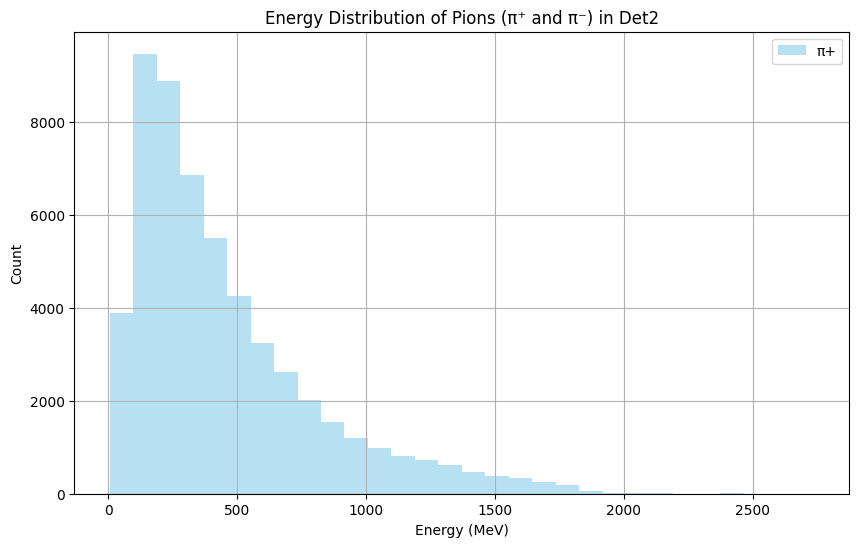

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(pi_p_2_e, bins=30, alpha=0.6, label='π+', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Pions (π⁺ and π⁻) in Det2')
plt.legend()
plt.grid(True)
plt.show()

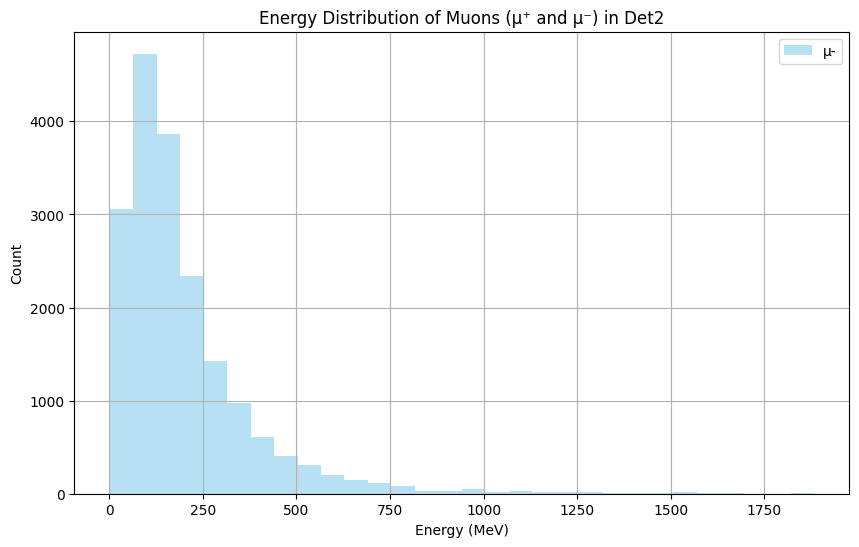

In [40]:
plt.figure(figsize=(10, 6))
plt.hist(mu_m_2_e, bins=30, alpha=0.6, label='μ-', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Muons (μ⁺ and μ⁻) in Det2')
plt.legend()
plt.grid(True)
plt.show()

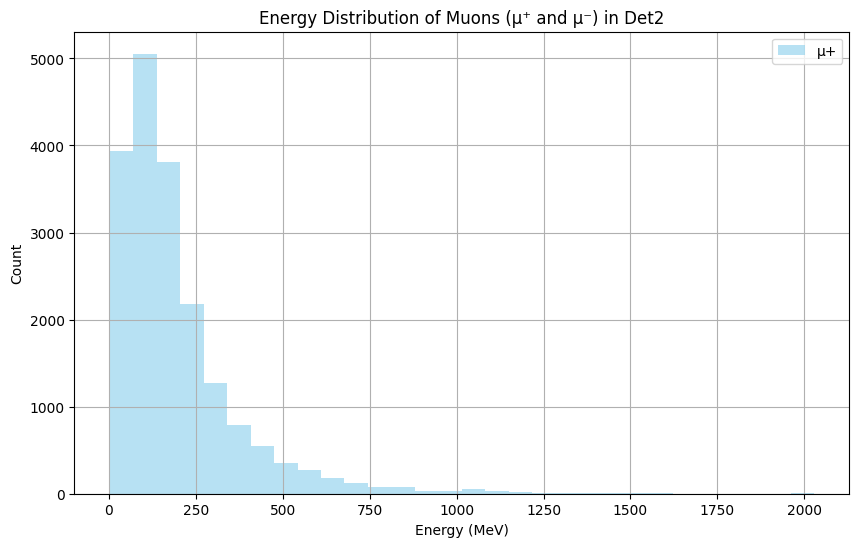

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(mu_p_2_e, bins=30, alpha=0.6, label='μ+', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Muons (μ⁺ and μ⁻) in Det2')
plt.legend()
plt.grid(True)
plt.show()


Plot total number of muon and pions vs energy 

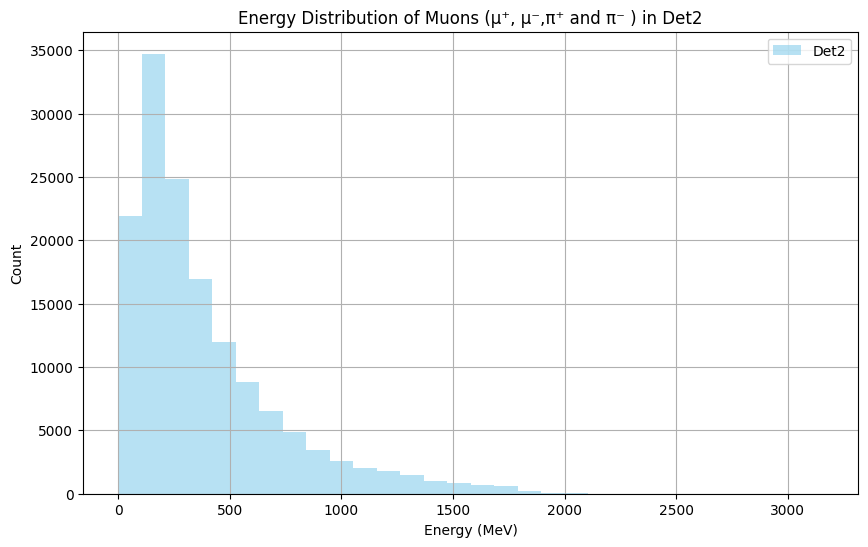

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(det2_energy, bins=30, alpha=0.6, label='Det2', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Muons (μ⁺, μ⁻,π⁺ and π⁻ ) in Det2')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
len(det4_energy)

61487

In [44]:
import csv

In [52]:
# Initialize separate lists for each column
detector_list = []
particle_type_list = []
x_list = []
px_list = []
y_list = []
py_list = []
z_list = []
pz_list = []
total_energy_list = []

# Path to your CSV file
filename = '6D_vector.csv'  # Change to your file path

# Read the CSV file
with open(filename, mode='r', newline='') as file:
    reader = csv.DictReader(file)
    for row in reader:
        detector_list.append(row['Detector'])
        particle_type_list.append(row['ParticleType'])
        x_list.append(float(row['x[cm]']))
        px_list.append(float(row['px[MeV/c]']))
        y_list.append(float(row['y[cm]']))
        py_list.append(float(row['py[MeV/c]']))
        z_list.append(float(row['z[cm]']))
        pz_list.append(float(row['pz[MeV/c]']))
        total_energy_list.append(float(row['TotalEnergy[MeV]']))

In [123]:
x_3 = []
x_4 = []
y_3 = []
y_4 = []
x_2 = []
y_2 = []
z_4 = []
pz_3 = []
pz_4 = []
py_3 = []
py_4 = []
px_3 = []
px_4 = []
px_2 = []
py_2 = []
pz_2 = []
for i in range(0,len(detector_list)):
    if int(detector_list[i]) == 2:
        px_2.append(px_list[i])
        py_2.append(py_list[i])
        pz_2.append(pz_list[i])
        x_2.append(x_list[i])
        y_2.append(y_list[i])
    if int(detector_list[i]) == 3:
        pz_3.append(pz_list[i])
        px_3.append(px_list[i])
        py_3.append(py_list[i])
        x_3.append(x_list[i])
        y_3.append(y_list[i])
    if int(detector_list[i]) == 4:
        pz_4.append(pz_list[i])
        px_4.append(px_list[i])
        py_4.append(py_list[i])
        x_4.append(x_list[i])
        y_4.append(y_list[i])
        z_4.append(z_list[i])

In [93]:
len(x_3)

2336

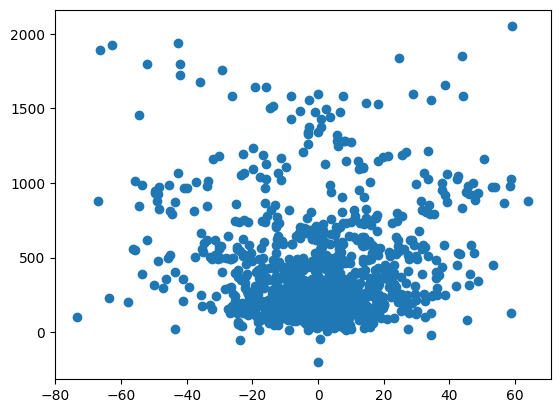

In [102]:
plt.scatter(x_3,pz_3)
plt.show()

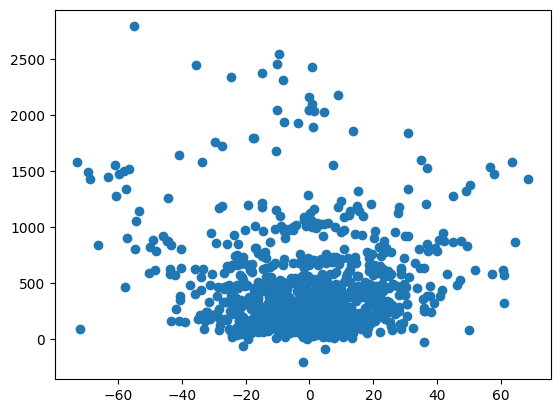

In [103]:
plt.scatter(x_4,pz_4)
plt.show()

In [111]:
import statistics as stat

print(stat.mean(pz_2)) #before helium cloud
print(stat.mean(pz_3)) #after helium cloud
print(stat.mean(pz_4)) #after rf cavity

361.2830378055456
403.28146922945206
414.2016121222411


In [112]:
print(stat.mean(px_2)) #before helium cloud
print(stat.mean(px_3)) #after helium cloud
print(stat.mean(px_4)) #after rf cavity

2.4533780785019803
17.489050721746576
-3.188230855687607


In [113]:
print(stat.mean(py_2)) #before helium cloud
print(stat.mean(py_3)) #after helium cloud
print(stat.mean(py_4)) #after rf cavity

-10.899944145120633
-5.73262902140411
-16.98003048556876


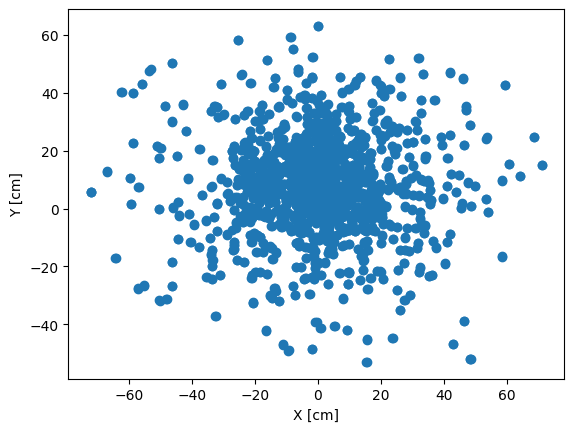

In [117]:
plt.scatter(x_2,y_2)
plt.xlabel("X [cm]")
plt.ylabel("Y [cm]")
plt.show()

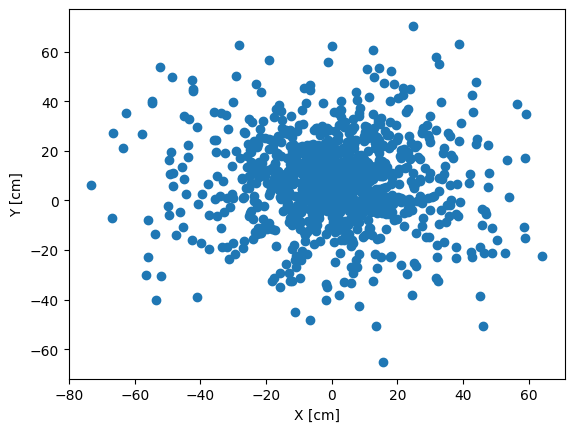

In [118]:
plt.scatter(x_3,y_3)
plt.xlabel("X [cm]")
plt.ylabel("Y [cm]")
plt.show()

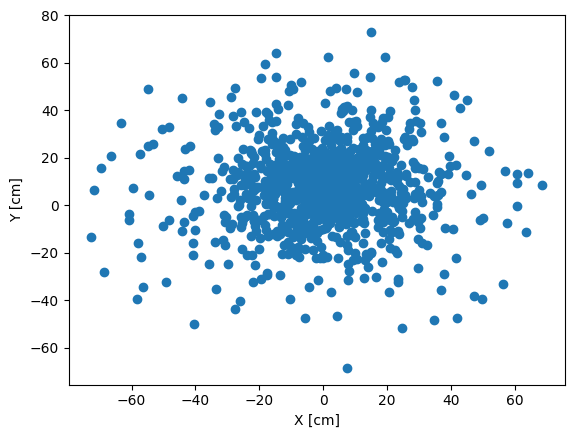

In [119]:
plt.scatter(x_4,y_4)
plt.xlabel("X [cm]")
plt.ylabel("Y [cm]")
plt.show()

In [126]:
print(len(x_2),
len(x_3),
len(x_4))

2777 1168 1178
